In [ ]:

file_path = "kangaroo_softmax_lr_0.00025_llr_0.00025_blr_0.00025_gamma_0.99\
_bentcoef_0.01_numenvs_60_steps_128_pretrained_False_joint_True_0"

In [134]:
env = "kangaroo"
blend_function = "softmax"
lr = 2.5e-4
llr = 2.5e-4
blr = 2.5e-4
gamma = 0.99
bentcoef = 0.01
num_envs = 60
steps = 128
pretrained = False
joint = True

seeds = [0, 50, 100]

In [135]:
import pickle
episodic_returns_list = []
episodic_lengths_list = []
value_losses_list = []
policy_losses_list = []
entropies_list = []
blend_entropies_list = []

for seed in seeds:
    dir_name = f"{env}_{blend_function}_lr_{lr}_llr_{llr}_blr_{blr}_gamma_{gamma}_bentcoef_{bentcoef}_numenvs_{num_envs}_steps_{steps}_pretrained_{pretrained}_joint_{joint}_{seed}"
    base_dir_path = "../out/runs/{}/checkpoints/".format(dir_name)
    file_path = base_dir_path + "training_log.pkl"
    with open(file_path, "rb") as f:
            episodic_returns, episodic_lengths, value_losses, policy_losses, entropies, blend_entropies = pickle.load(f)
            # append to list 
            episodic_returns_list.append(episodic_returns)
            episodic_lengths_list.append(episodic_lengths)
            value_losses_list.append(value_losses)
            policy_losses_list.append(policy_losses)
            entropies_list.append(entropies)
            blend_entropies_list.append(blend_entropies)

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [142]:
df_rewards = pd.DataFrame(episodic_returns_list).astype(float).T



In [167]:
# apply smoothing
# df_rewards_smooth = df_rewards.rolling(window=200).mean()

df_rewards_smooth = []
for _, rewards in df_rewards.items():
    df_rewards_smooth.append(smooth(rewards, 0.99))
df_rewards_smooth = pd.concat(df_rewards_smooth, axis=1)

In [168]:
mean = df_rewards_smooth.mean(axis=1)
std = df_rewards_smooth.std(axis=1)

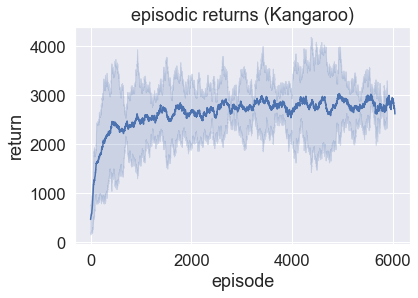

In [169]:

plt.figure()
plt.title("episodic returns (Kangaroo)")
plt.xlabel("episode")
plt.ylabel("return")
plt.plot(mean.index, mean, "b")
plt.fill_between(std.index, mean - 2 * std, mean + 2 * std, color="b", alpha=0.2)

<AxesSubplot:>

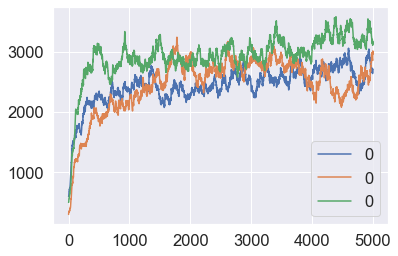

In [133]:
df_rewards_smooth.plot()

In [22]:
std

0        152.752523
1        152.752523
2        907.377173
3        200.000000
4       1096.965511
           ...     
3995    1096.965511
3996    4880.915215
3997    3121.431296
3998    2003.330560
3999    2936.551265
Length: 4000, dtype: float64

In [37]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return pd.DataFrame(smoothed)

<AxesSubplot:>

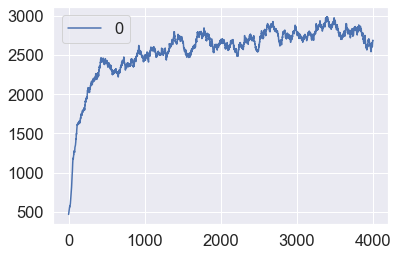

In [40]:
smooth(mean, 0.99).plot()

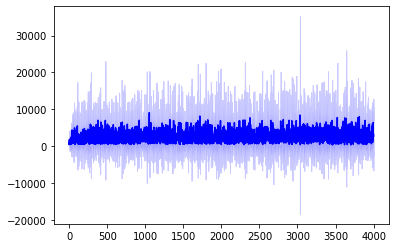

In [29]:
def plot_data(data, xaxis='Epoch', value="AverageEpRet", condition="Condition1", smooth=1, **kwargs):
    if smooth > 1:
        """
        smooth data with moving window average.
        that is,
            smoothed_y[t] = average(y[t-k], y[t-k+1], ..., y[t+k-1], y[t+k])
        where the "smooth" param is width of that window (2k+1)
        """
        y = np.ones(smooth)
        for datum in data:
            x = np.asarray(datum[value])
            z = np.ones(len(x))
            smoothed_x = np.convolve(x,y,'same') / np.convolve(z,y,'same')
            datum[value] = smoothed_x

    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)
    sns.set(style="darkgrid", font_scale=1.5)
    # sns.tsplot(data=data, time=xaxis, value=value, unit="Unit", condition=condition, ci='sd', **kwargs)
    sns.lineplot(data=data, x=xaxis, y=value, hue=condition, ci='sd', **kwargs)

    """
    If you upgrade to any version of Seaborn greater than 0.8.1, switch from 
    tsplot to lineplot replacing L29 with:

        sns.lineplot(data=data, x=xaxis, y=value, hue=condition, ci='sd', **kwargs)

    Changes the colorscheme and the default legend style, though.
    """
    plt.legend(loc='best').set_draggable(True)
    #plt.legend(loc='upper center', ncol=3, handlelength=1,
    #           borderaxespad=0., prop={'size': 13})

    """
    For the version of the legend used in the Spinning Up benchmarking page, 
    swap L38 with:

    plt.legend(loc='upper center', ncol=6, handlelength=1,
               mode="expand", borderaxespad=0., prop={'size': 13})
    """

    xscale = np.max(np.asarray(data[xaxis])) > 5e3
    if xscale:
        # Just some formatting niceness: x-axis scale in scientific notation if max x is large
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.tight_layout(pad=0.5)

<AxesSubplot:>

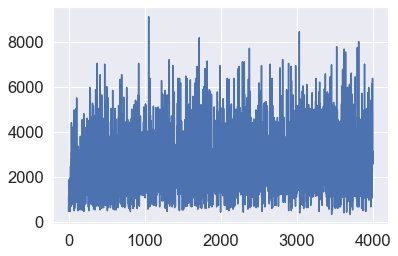

In [34]:
mean.interpolate('pchip', order=2).plot()